In [27]:
#import packages

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import of first database census

census = pd.read_csv('censusCrimeClean.csv')

In [23]:
#pearson correlation test

pearson = scipy.stats.pearsonr(census['medIncome'], census['ViolentCrimesPerPop'])
print(pearson)

(-0.4242206167261274, 6.334424808039891e-88)


In [25]:
#spearman correlation test

spearman = scipy.stats.spearmanr(census['medIncome'], census['ViolentCrimesPerPop'])
print(spearman)

SpearmanrResult(correlation=-0.482169950997556, pvalue=1.2978853095169542e-116)


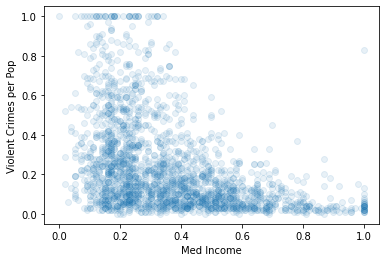

In [19]:
#Visualization in scatter plot

plt.scatter(census['medIncome'],census['ViolentCrimesPerPop'], alpha = 0.1)
plt.xlabel('Med Income')
plt.ylabel('Violent Crimes per Pop')
plt.show()

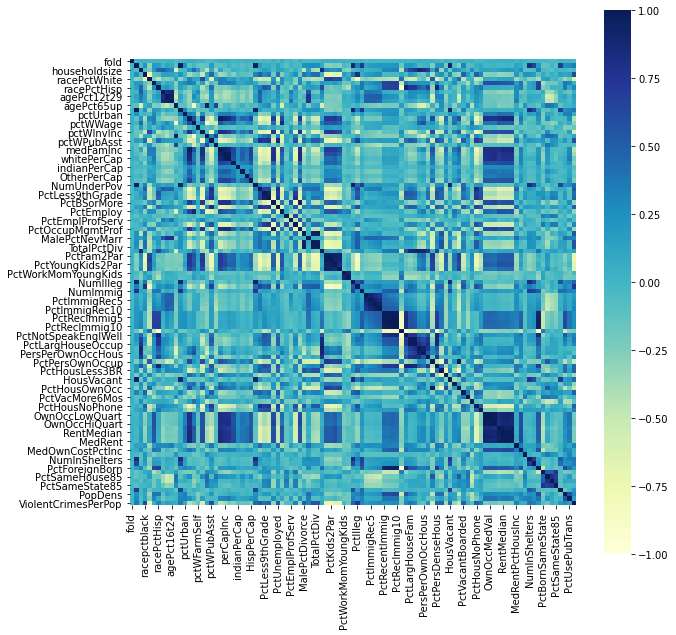

In [20]:
#Correlation between variables on seaborn heatmap

corr = census.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr,cmap='YlGnBu',vmin=-1,vmax=1, center=0,square=True)

In [64]:
#import of second database 'heart diseases'

hd= pd.read_csv('heart.csv')

In [71]:
print(hd.head())
print (hd.shape[0] - hd.count())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [28]:
#Addition of new columns

hd['gender']= np.where(hd['sex'] == 1, 'M', 'F')
hd['hasHeartDisease']= np.where(hd['target'] == 0, 1, 0)

In [38]:
#Variance of resting blood pressure considering presence of heart disease

print(hd['trestbps'].groupby(hd['hasHeartDisease']).var())

hasHeartDisease
0    261.456393
1    350.810801
Name: trestbps, dtype: float64


In [39]:
#Mean of resting blood pressure considering presence of heart disease

print(hd['trestbps'].groupby(hd['hasHeartDisease']).mean())

hasHeartDisease
0    129.303030
1    134.398551
Name: trestbps, dtype: float64


In [72]:
hd0= hd.iloc[hd['hasHeartDisease']==0,[hd['hasHeartDisease'],hd['trestbps']]]

KeyError: 'hasHeartDisease'

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

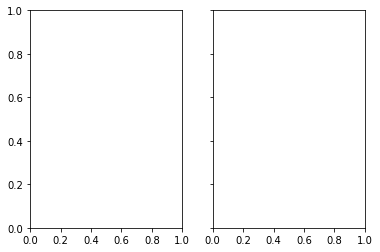

In [60]:

fig, ax = plt.subplots(ncols=2,sharey=True)
ax.hist(hd.loc[hd['hasHeartDisease']==0,hd['trestbps']])
ax.hist(hd.loc[hd['hasHeartDisease']==0,hd['trestbps']])
plt.show()
